In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../clean_data/merged_data.csv", low_memory=False, index_col=[0])

In [2]:
df.shape

(38967, 113)

## EDA

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38967 entries, 0 to 38966
Data columns (total 113 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    bbl                             38967 non-null  int64  
 1    rs_share_diff                   38967 non-null  float64
 2    total_units_19                  38967 non-null  int64  
 3    boro                            38967 non-null  int64  
 4    cd_x                            38967 non-null  int64  
 5    ct_10                           38967 non-null  int64  
 6    year_built                      38967 non-null  int64  
 7    ejectment_count                 38967 non-null  float64
 8    possession_count                38967 non-null  float64
 9    eviction_count                  38967 non-null  float64
 10   aleration_count                 38967 non-null  float64
 11   altered_lessthan5yrs            38967 non-null  float64
 12   altered_morethan

In [5]:
features = df.columns.to_list()
features.remove('bbl')
features.remove('rs_share_diff')

### RS Share Histograms

Text(0.5, 1.0, 'rs_share_diff')

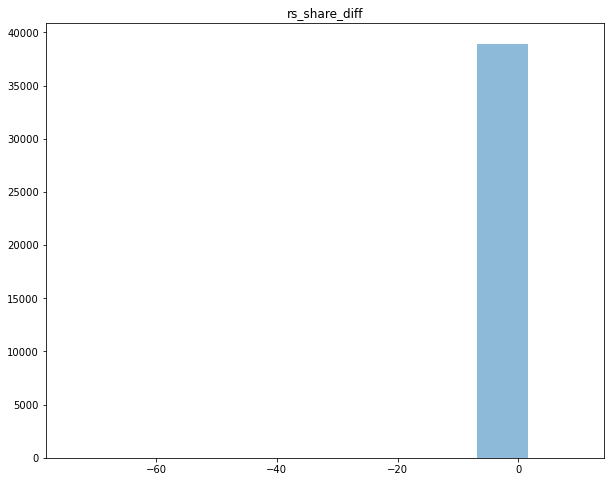

In [6]:
# without rs_share bound - concentration on 0

fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'], alpha=0.5)
axe.set_title('rs_share_diff')

In [7]:
df['rs_share_diff'].describe() # Prob need to set a floor/ceiling for the target var. 

count    38967.000000
mean        -0.196777
std          0.618917
min        -74.000000
25%         -0.250000
50%          0.000000
75%          0.000000
max         10.000000
Name: rs_share_diff, dtype: float64

Text(0.5, 1.0, 'rs_share_diff')

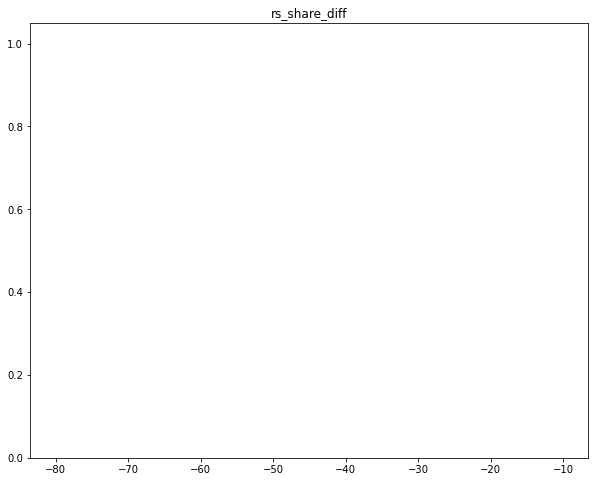

In [8]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(-80,-10,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

Text(0.5, 1.0, 'rs_share_diff')

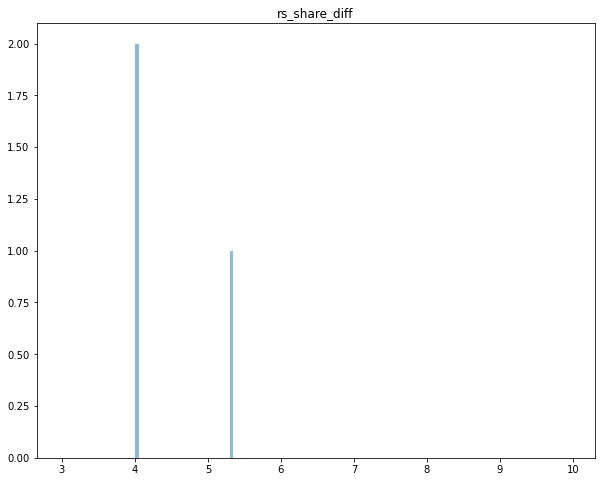

In [9]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(3,10,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

Text(0.5, 1.0, 'rs_share_diff')

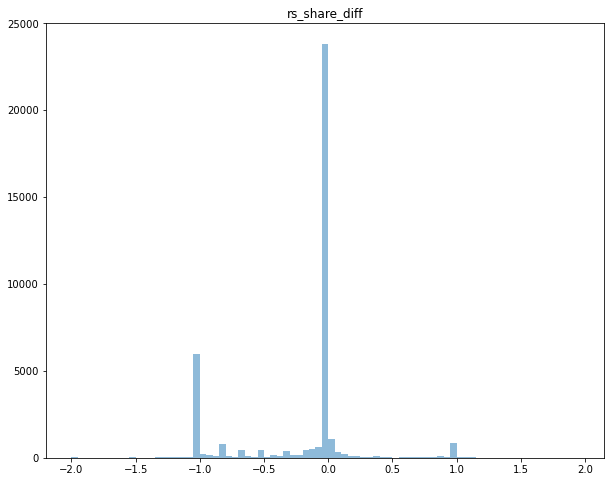

In [10]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(-2,2,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

In [11]:
df['rs_share_diff'] = df['rs_share_diff'].clip(lower = -2, upper = 2) # clipping (-2,2)

### Histogram of Features

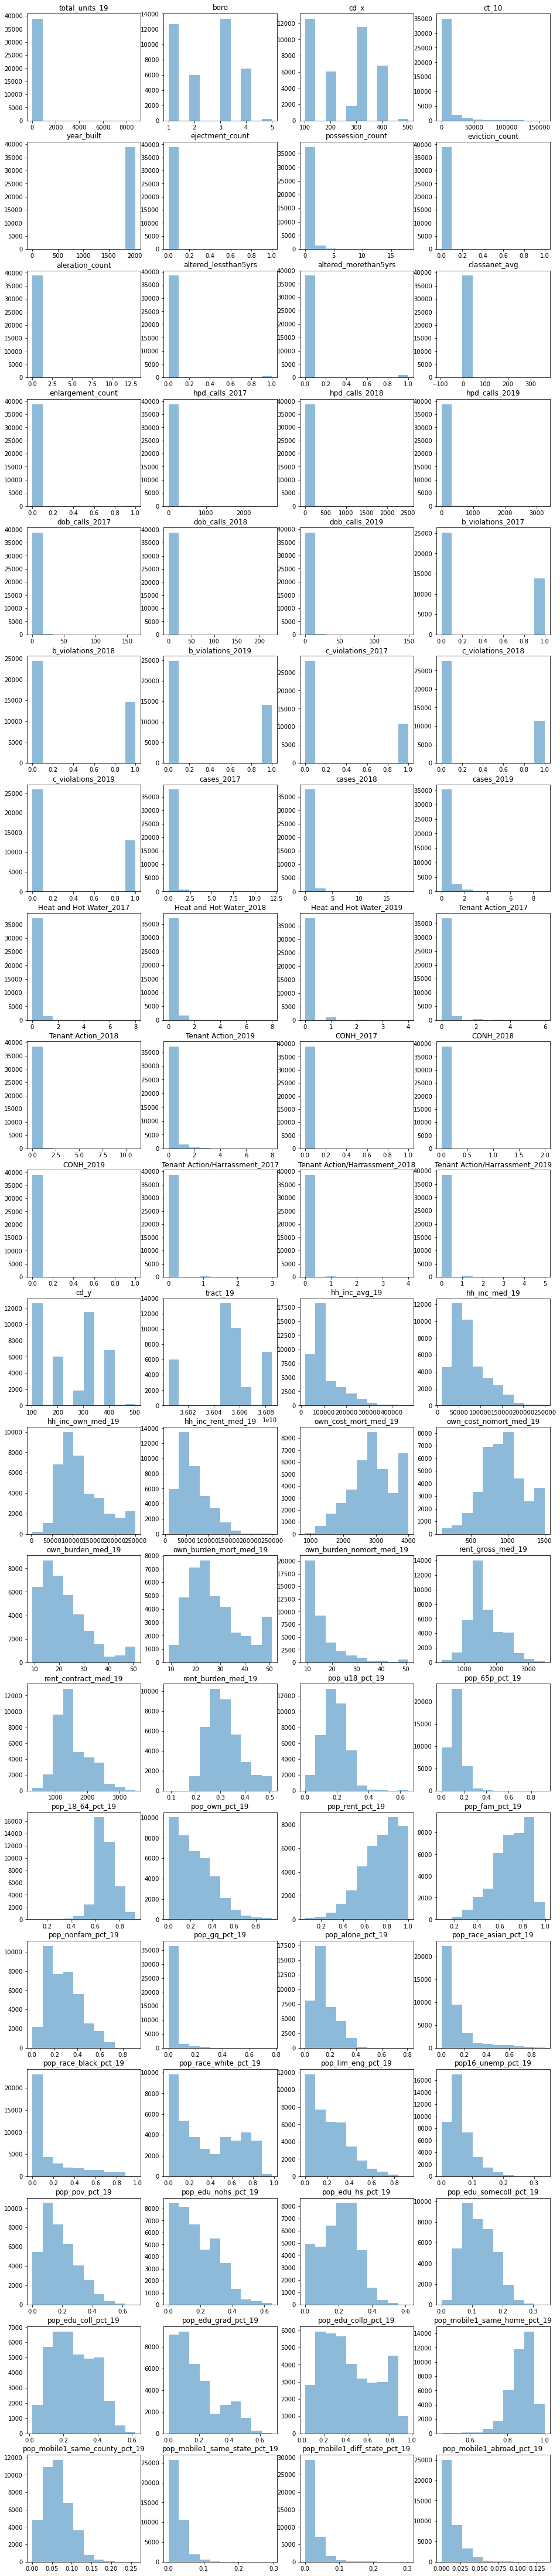

In [12]:
rows=20
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        my_data = df[my_col]
        axe.hist(my_data, alpha=0.5)
#         axe.hist(my_data, bins=np.arange(my_data.quantile(0.01), my_data.quantile(0.99),25), alpha=0.5)
        axe.set_title(my_col)

### Scatte plots - rs share diff vs each feature


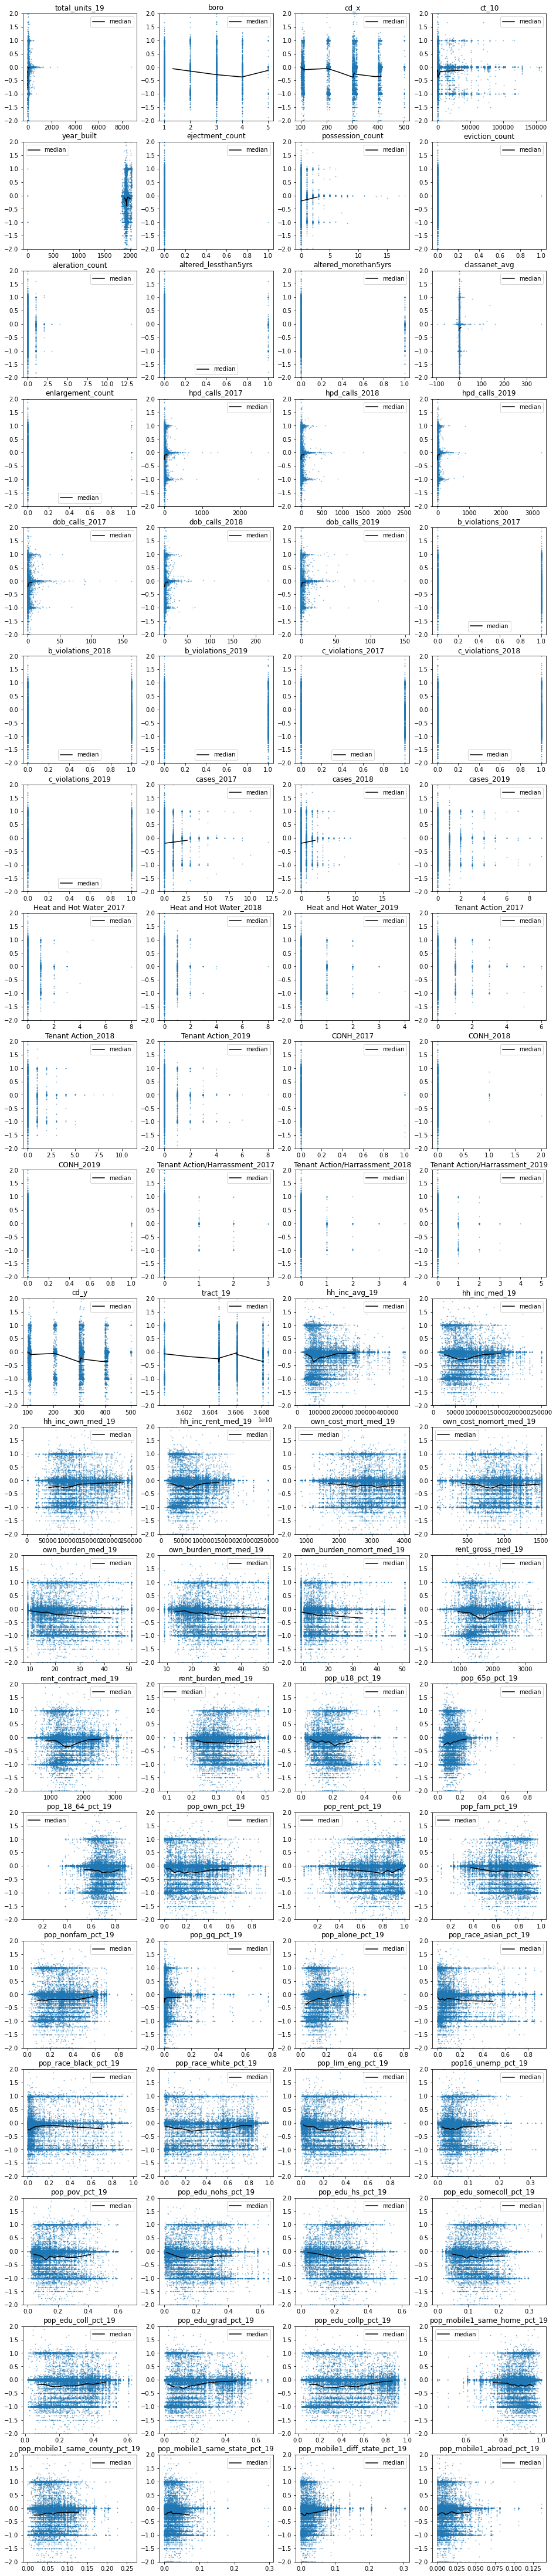

In [13]:
# scatte plot for rs share diff vs feature
rows=20
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        
        df_sub = df[[my_col, 'rs_share_diff']].reset_index(drop=True)
#         df_sub = df_sub[(df_sub[my_col] > df_sub[my_col].quantile(0.02) ) & (df_sub[my_col] < df_sub[my_col].quantile(0.98) )]
        df_sub['my_bin'] = pd.cut(df_sub[my_col], 
                          bins=df_sub[my_col].quantile(np.arange(0,1.1,0.1)).values, 
                          include_lowest=True,
                          duplicates='drop') 
        df_binned = df_sub.groupby('my_bin')[[my_col, 'rs_share_diff']].mean()

        my_data = df[my_col]
        target_data = df['rs_share_diff']
        axe.scatter(my_data, target_data, alpha=0.5, s=0.6)
        axe.plot(df_binned[my_col].values, df_binned['rs_share_diff'].values, color='black', label='median')

        axe.set_title(my_col)
        axe.set_ylim(-2,2)
        axe.legend()
#         if my_col == 'boro':
#             break
#     break

### Correlation Heatmap

<AxesSubplot:>

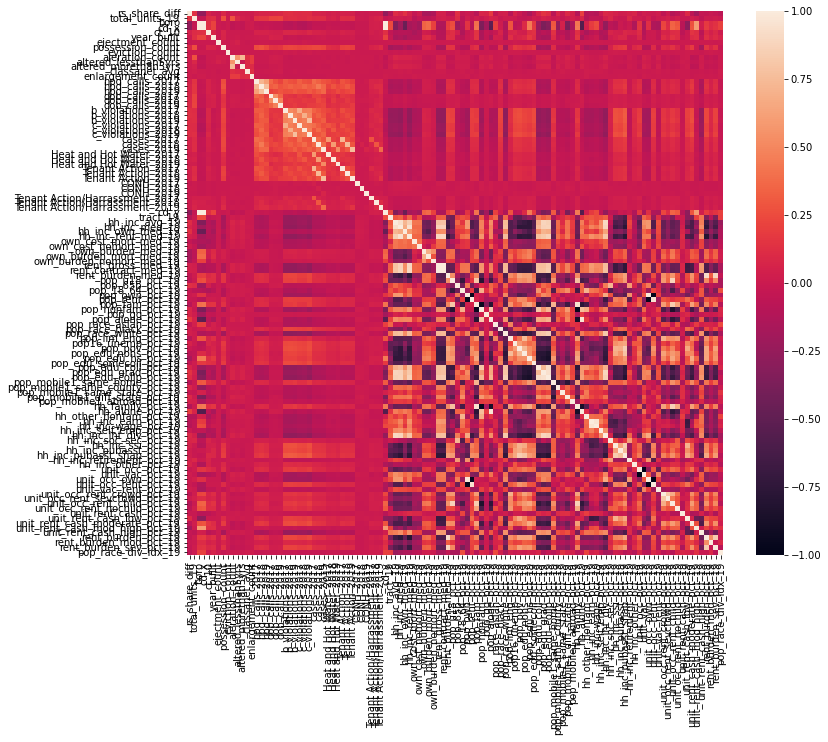

In [14]:
# correlation heatmap of selected columns
my_cols = df.columns.to_list()
my_cols.remove('bbl')

corr = df[my_cols].corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


<AxesSubplot:>

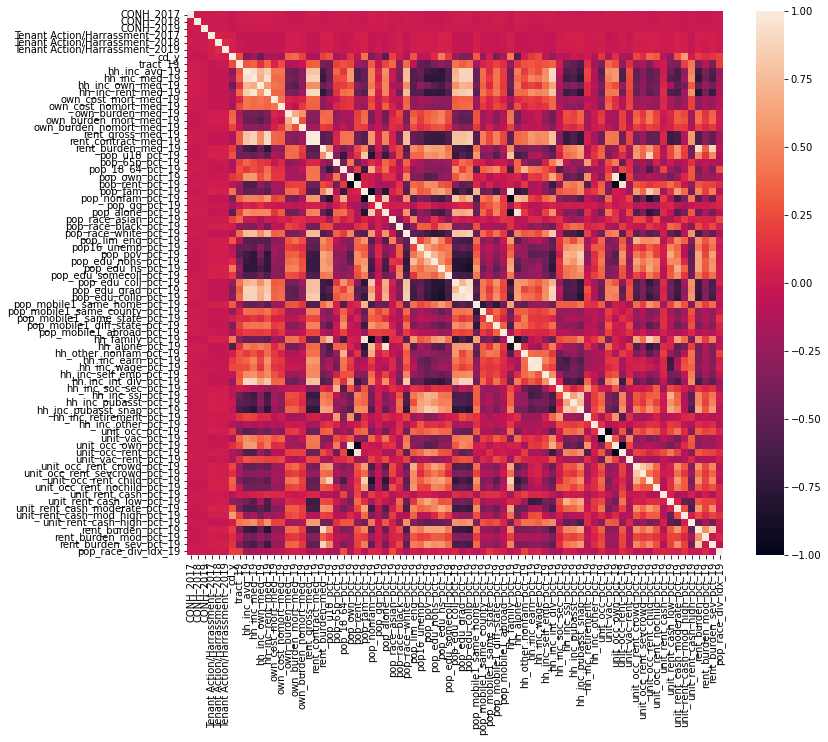

In [15]:
# zooming in to look at the last 60% --- prob need to combine / drop some ACS cols that are similar to each other
my_cols = df.columns.to_list()
my_cols.remove('bbl')

corr = df[my_cols[35:]].corr()

fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [16]:
df.head(4)

,bbl,rs_share_diff,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,...,unit_occ_rent_nochild_pct_19,unit_rent_cash_pct_19,unit_rent_cash_low_pct_19,unit_rent_cash_moderate_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,rent_burden_mod_pct_19,rent_burden_sev_pct_19,pop_race_div_idx_19
0,1000780047,0.0000,483,1,101,1502,2016,0.0,0.0,0.0,...,0.172615,0.986616,0.019478,0.012522,0.020522,0.083478,0.326156,0.166961,0.159195,0.450691
1,1001350019,0.0000,4,1,101,21,1915,0.0,0.0,0.0,...,0.277924,0.969777,0.190379,0.031165,0.004743,0.000000,0.241661,0.149762,0.091899,0.457072
2,1001620013,-0.0500,20,1,103,29,1915,0.0,0.0,0.0,...,0.359562,0.967131,0.405767,0.342945,0.079300,0.118950,0.701854,0.336766,0.365088,0.612518
3,1001630024,0.1875,16,1,103,29,1915,0.0,0.0,0.0,...,0.359562,0.967131,0.405767,0.342945,0.079300,0.118950,0.701854,0.336766,0.365088,0.612518


### Running Linear Regression Between Y and each predictor to select columns (based on the p-value)

In [17]:
import statsmodels.api as sm


In [18]:
# linear regression
pval_dict = {}
for feature in features:
    y = df['rs_share_diff']
    x = df[feature]
    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()
    p_val = model.pvalues[feature]
           
    pval_dict[feature] = p_val

In [19]:
pval_df = pd.DataFrame(pval_dict.items())
pval_df.columns = ['feature', 'p_val']
pval_df = pval_df.sort_values(by='p_val')
pval_df

,feature,p_val
1,boro,0.000000
2,cd_x,0.000000
105,unit_rent_cash_mod_high_pct_19,0.000000
81,hh_alone_pct_19,0.000000
40,cd_y,0.000000
...,...,...
57,pop_own_pct_19,0.482105
7,eviction_count,0.559943
36,CONH_2019,0.572444
85,hh_inc_self_emp_pct_19,0.733200


In [20]:
pval_df[:30] ## first 30 col with significant p values

,feature,p_val
1,boro,0.000000e+00
2,cd_x,0.000000e+00
105,unit_rent_cash_mod_high_pct_19,0.000000e+00
81,hh_alone_pct_19,0.000000e+00
40,cd_y,0.000000e+00
62,pop_alone_pct_19,1.077535e-271
49,own_burden_mort_med_19,9.387005e-254
48,own_burden_med_19,4.464218e-226
70,pop_edu_hs_pct_19,6.608527e-194
73,pop_edu_grad_pct_19,3.794589e-184


array([[<AxesSubplot:title={'center':'rs_share_diff'}>]], dtype=object)

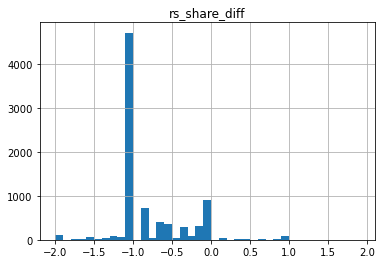

In [21]:
df.loc[df['total_units_19'] <= 6, ['rs_share_diff']].hist(bins=np.arange(-2,2,0.1))

array([[<AxesSubplot:title={'center':'rs_share_diff'}>]], dtype=object)

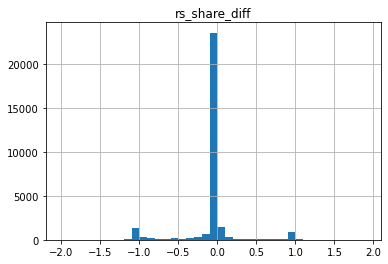

In [22]:
df.loc[df['total_units_19'] > 6, ['rs_share_diff']].hist(bins=np.arange(-2,2,0.1))